In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [7]:
DATA_PATH = '../../data'

In [8]:
def r2(x, y):
    return pearsonr(x, y)[0] ** 2

In [9]:
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"] + 0.0001)

In [10]:
df_non_wc = df.query("r_type == 'NON-WC'").copy()

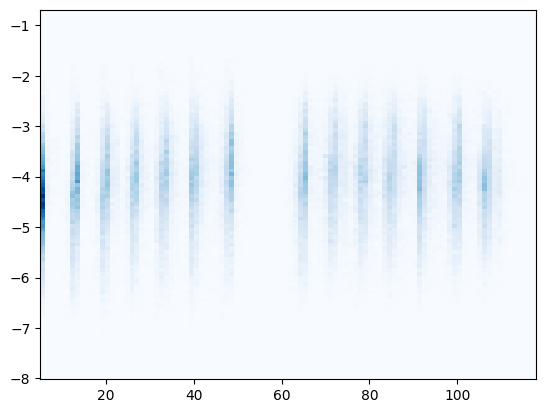

In [12]:
plt.hist2d(df_non_wc["r_pos"], df_non_wc["ln_r_data"], bins=100, cmap="Blues");

('AAAA&UCGU', 0) 30 0.7676265998587388


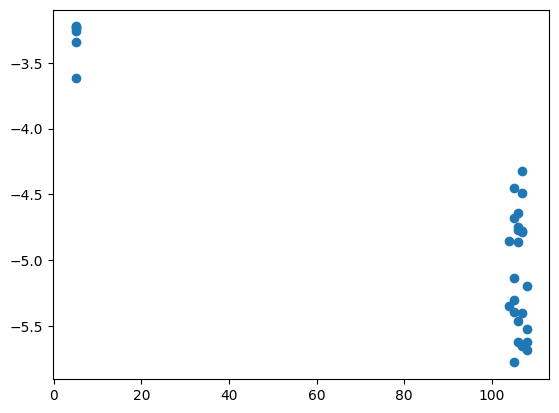

In [16]:
avg_r2 = 0
count = 0
for i, g in df.groupby(["m_sequence", "m_pos"]):
    r2_cor =  r2(g["r_pos"], g["ln_r_data"])
    avg_r2 += r2_cor
    count += 1
    if r2_cor > 0.7 and len(g) > 10:
        print(i, len(g), r2_cor)
        plt.scatter(g["r_pos"], g["ln_r_data"])
        break

In [ ]:
print("Average R2: ", avg_r2 / count)

Average R2:  0.13683996243217722
